In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/dataset/wav_files.zip /content/

In [4]:
from IPython.display import Audio
import librosa
from librosa import display
import numpy as np
import scipy
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [5]:
y, sr = librosa.load('wav_files/0_unhealthy.wav', sr = 22050)

In [6]:
Audio(y, rate = sr)

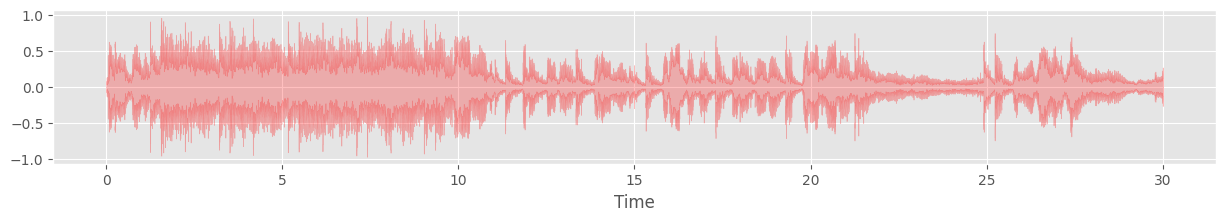

In [7]:
plt.figure(figsize=(15,2))
librosa.display.waveshow(y  = y,
                     sr     = sr,
                     alpha  = 0.25,
                     color  = 'red')

ZCR mean = 0.09
ZCR std dev = 0.04


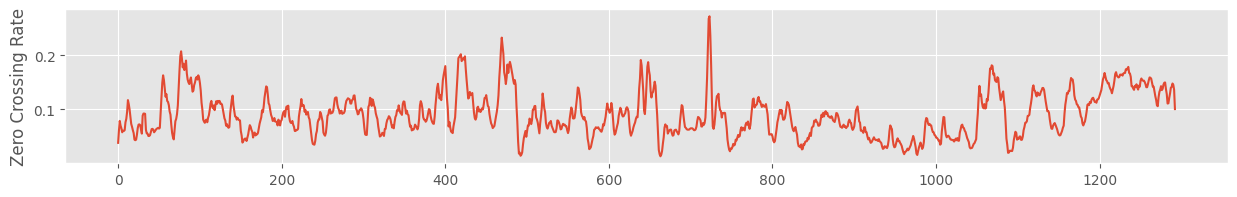

In [8]:
zcr = librosa.feature.zero_crossing_rate(y + 0.0001, frame_length=2048, hop_length=512)[0]
plt.figure(figsize=(15,2))
plt.plot(zcr)
plt.ylabel('Zero Crossing Rate')
print('ZCR mean = {:.2f}'.format(np.mean(zcr)))
print('ZCR std dev = {:.2f}'.format(np.std(zcr)))

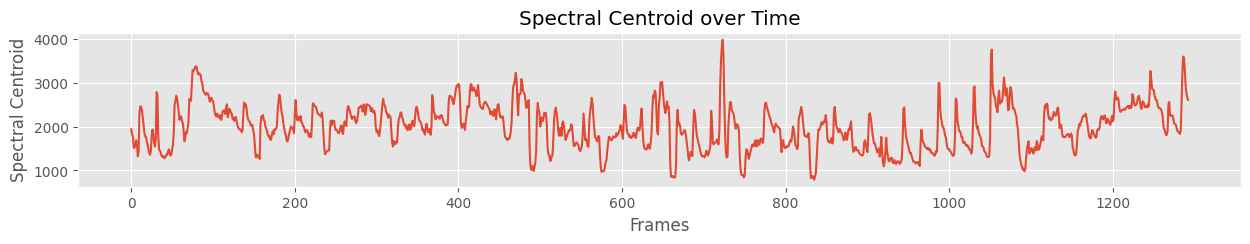

Spectral Centroid mean = 1996.33
Spectral Centroid std dev = 503.38


In [10]:
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

# Plotting
plt.figure(figsize=(15, 2))
plt.plot(spectral_centroids)
plt.ylabel('Spectral Centroid')
plt.xlabel('Frames')
plt.title('Spectral Centroid over Time')
plt.show()

# Menghitung dan mencetak mean dan std dev dari spectral centroid
print('Spectral Centroid mean = {:.2f}'.format(np.mean(spectral_centroids)))
print('Spectral Centroid std dev = {:.2f}'.format(np.std(spectral_centroids)))

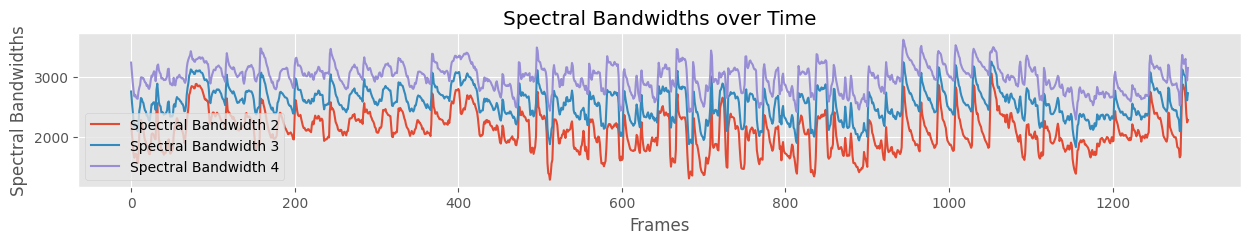

Spectral Bandwidth-2 mean = 2094.33
Spectral Bandwidth-2 std dev = 310.81
Spectral Bandwidth-3 mean = 2562.13
Spectral Bandwidth-3 std dev = 256.82
Spectral Bandwidth-4 mean = 3000.05
Spectral Bandwidth-4 std dev = 226.24


In [12]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=2)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=4)[0]

# Plotting
plt.figure(figsize=(15, 2))
plt.plot(spectral_bandwidth_2, label='Spectral Bandwidth 2')
plt.plot(spectral_bandwidth_3, label='Spectral Bandwidth 3')
plt.plot(spectral_bandwidth_4, label='Spectral Bandwidth 4')
plt.ylabel('Spectral Bandwidths')
plt.xlabel('Frames')
plt.title('Spectral Bandwidths over Time')
plt.legend()
plt.show()

# Menghitung dan mencetak mean dan std dev dari spectral bandwidths
print('Spectral Bandwidth-2 mean = {:.2f}'.format(np.mean(spectral_bandwidth_2)))
print('Spectral Bandwidth-2 std dev = {:.2f}'.format(np.std(spectral_bandwidth_2)))
print('Spectral Bandwidth-3 mean = {:.2f}'.format(np.mean(spectral_bandwidth_3)))
print('Spectral Bandwidth-3 std dev = {:.2f}'.format(np.std(spectral_bandwidth_3)))
print('Spectral Bandwidth-4 mean = {:.2f}'.format(np.mean(spectral_bandwidth_4)))
print('Spectral Bandwidth-4 std dev = {:.2f}'.format(np.std(spectral_bandwidth_4)))

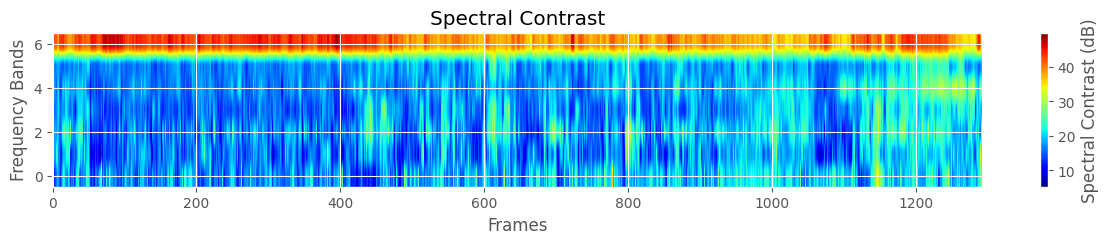

Means: [18.7427104  16.97761539 18.80225008 17.52042919 18.78647908 17.93351729
 40.56427075]
Std devs: [4.60114107 4.3187968  4.92437761 3.95122089 4.07390681 2.69301079
 3.34786934]


In [14]:
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=6, fmin=200.0)

# Plotting
plt.figure(figsize=(15, 2))
plt.imshow(spectral_contrast, aspect='auto', origin='lower', cmap='jet')
plt.colorbar(label='Spectral Contrast (dB)')
plt.xlabel('Frames')
plt.ylabel('Frequency Bands')
plt.title('Spectral Contrast')
plt.show()

# Menghitung dan mencetak mean dan std dev dari spectral contrast
print('Means:', np.mean(spectral_contrast, axis=1))  # Values are on dB scale
print('Std devs:', np.std(spectral_contrast, axis=1))

Spectral Centroid mean = 4184.74
Spectral Centroid std dev = 1131.31


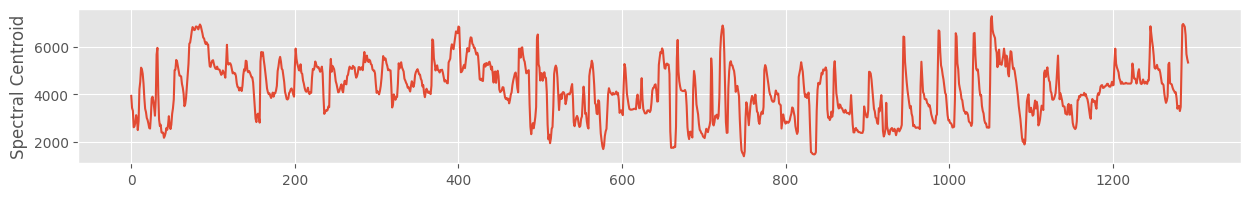

In [17]:
spectral_rolloff = librosa.feature.spectral_rolloff(y = y+ 0.01, sr=sr, roll_percent = 0.85)[0]
plt.figure(figsize=(15,2))
plt.plot(spectral_rolloff)
plt.ylabel('Spectral Centroid')
print('Spectral Centroid mean = {:.2f}'.format(np.mean(spectral_rolloff)))
print('Spectral Centroid std dev = {:.2f}'.format(np.std(spectral_rolloff)))

Means [-116.62627    109.25263    -23.163752    40.67948    -11.888837
   23.152943   -15.409277    15.1249895  -13.522578    12.695887
  -10.871556     8.497991   -11.577597     2.1976974   -6.180506
    1.9899799   -7.9558887    2.0833836   -2.3929138   -1.5417932]
Std devs [76.45513   22.034203  19.20561   12.692556  13.989555  11.280761
 11.413704   7.9810934 10.571752   7.693357   8.787994   7.394069
  6.250264   7.731579   8.510248   8.485811   5.9676447  5.7460155
  5.5139384  7.6079187]


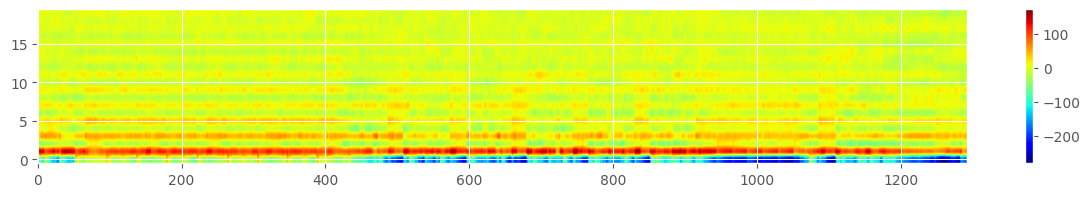

In [19]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
plt.figure(figsize=(15,2))
plt.imshow(mfccs, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
print('Means', np.mean(mfccs, axis=1))
print('Std devs', np.std(mfccs, axis=1))

In [22]:
import os
import numpy as np
import pandas as pd
import scipy
import librosa
from tqdm import tqdm

WAV_DIR = 'wav_files/'
wav_files = os.listdir(WAV_DIR)

col_names = ['file_name',
             'zcr_mean', 'zcr_std',
             'spectral_centroid_mean', 'spectral_centroid_std',
             'spectral_bandwidth_2_mean', 'spectral_bandwidth_2_std',
             'spectral_bandwidth_3_mean', 'spectral_bandwidth_3_std',
             'spectral_bandwidth_4_mean', 'spectral_bandwidth_4_std'] + \
            ['spectral_contrast_' + str(i+1) + '_mean' for i in range(7)] + \
            ['spectral_contrast_' + str(i+1) + '_std' for i in range(7)] + \
            ['spectral_rolloff_mean', 'spectral_rolloff_std'] + \
            ['mfccs_' + str(i+1) + '_mean' for i in range(20)] + \
            ['mfccs_' + str(i+1) + '_std' for i in range(20)]

df = pd.DataFrame(columns=col_names)

for f in tqdm(wav_files):
    try:
        # Read wav-file
        y, sr = librosa.load(WAV_DIR+f, sr=22050)

        feature_list = [f]

        zcr = librosa.feature.zero_crossing_rate(y=y + 0.0001, frame_length=2048, hop_length=512)[0]
        feature_list.append(np.mean(zcr))
        feature_list.append(np.std(zcr))

        spectral_centroids = librosa.feature.spectral_centroid(y=y+0.01, sr=sr)[0]
        feature_list.append(np.mean(spectral_centroids))
        feature_list.append(np.std(spectral_centroids))

        spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=2)[0]
        spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=3)[0]
        spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=4)[0]
        feature_list.append(np.mean(spectral_bandwidth_2))
        feature_list.append(np.std(spectral_bandwidth_2))
        feature_list.append(np.mean(spectral_bandwidth_3))
        feature_list.append(np.std(spectral_bandwidth_3))
        feature_list.append(np.mean(spectral_bandwidth_4))
        feature_list.append(np.std(spectral_bandwidth_4))

        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, n_bands=6, fmin=200.0)
        feature_list.extend(np.mean(spectral_contrast, axis=1))
        feature_list.extend(np.std(spectral_contrast, axis=1))

        spectral_rolloff = librosa.feature.spectral_rolloff(y=y+0.01, sr=sr, roll_percent=0.85)[0]
        feature_list.append(np.mean(spectral_rolloff))
        feature_list.append(np.std(spectral_rolloff))

        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        feature_list.extend(np.mean(mfccs, axis=1))
        feature_list.extend(np.std(mfccs, axis=1))

        feature_list[1:] = np.round(feature_list[1:], decimals=3)

    except Exception as e:
        print(f"Error processing {f}: {e}")
        continue

    df = pd.concat([df, pd.DataFrame([feature_list], columns=col_names)], ignore_index=True)

# Save file
df.to_csv('df_features.csv', index=False)


100%|██████████| 200/200 [02:16<00:00,  1.46it/s]
